In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
md = \
"""
| \textbf{Dataset}     | \textbf{Algorithm} | \textbf{pd} | \textbf{pf} | \textbf{d2h} | \textbf{prec} |
| cloudstack-1 day     | SIMPLE             | \gray{82}   | 34          | \gray{38}    | \gray{66}     |
|                      | Prior              | 18          | \gray{2}    | 82           | 57            |
| cloudstack-7 days    | SIMPLE             | \gray{69}   | 46          | 55           | 38            |
|                      | Prior              | \gray{66}   | \gray{11}   | \gray{36}    | \gray{65}     |
| cloudstack-14 days   | SIMPLE             | \gray{78}   | 37          | 43           | 11            |
|                      | Prior              | 71          | \gray{11}   | \gray{31}    | \gray{70}     |
| cloudstack-30 days   | SIMPLE             | \gray{87}   | 39          | 41           | 13            |
|                      | Prior              | 65          | \gray{9}    | \gray{36}    | \gray{78}     |
| cloudstack-90 days   | SIMPLE             | \gray{85}   | 33          | 36           | 25            |
|                      | Prior              | 75          | \gray{20}   | \gray{32}    | \gray{74}     |
| cocoon-1 day         | SIMPLE             | \gray{93}   | 15          | \gray{17}    | 26            |
|                      | Prior              | 17          | \gray{2}    | 83           | \gray{60}     |
| cocoon-7 days        | SIMPLE             | \gray{96}   | 21          | \gray{21}    | 22            |
|                      | Prior              | 68          | \gray{13}   | 35           | \gray{66}     |
| cocoon-14 days       | SIMPLE             | \gray{100}  | 27          | \gray{27}    | 3             |
|                      | Prior              | 75          | \gray{13}   | \gray{28}    | \gray{71}     |
| cocoon-30 days       | SIMPLE             | \gray{92}   | \gray{18}   | \gray{2}     | 11            |
|                      | Prior              | 67          | \gray{11}   | 35           | \gray{77}     |
| cocoon-90 days       | SIMPLE             | \gray{93}   | \gray{20}   | \gray{21}    | 16            |
|                      | Prior              | 64          | \gray{19}   | 41           | \gray{76}     |
| hadoop-1 day         | SIMPLE             | \gray{81}   | \gray{07}   | \gray{20}    | 02            |
|                      | Prior              | 22          | \gray{03}   | 78           | \gray{51}     |
| hadoop-7 days        | SIMPLE             | \gray{74}   | \gray{10}   | \gray{28}    | 04            |
|                      | Prior              | \gray{7}    | 18          | 35           | \gray{66}     |
| hadoop-14 days       | SIMPLE             | 71          | \gray{20}   | 35           | 02            |
|                      | Prior              | \gray{81}   | \gray{22}   | \gray{29}    | \gray{70}     |
| hadoop-30 days       | SIMPLE             | \gray{81}   | 38          | 42           | 08            |
|                      | Prior              | \gray{80}   | \gray{20}   | \gray{28}    | \gray{76}     |
| hadoop-90 days       | SIMPLE             | \gray{85}   | 44          | 46           | 24            |
|                      | Prior              | \gray{83}   | \gray{24}   | \gray{29}    | \gray{80}     |
| deeplearning-1 day   | SIMPLE             | \gray{79}   | 30          | \gray{37}    | \gray{87}     |
|                      | Prior              | 17          | \gray{30}   | 83           | 51            |
| deeplearning-7 days  | SIMPLE             | \gray{74}   | 40          | 48           | 22            |
|                      | Prior              | 66          | \gray{11}   | \gray{36}    | \gray{65}     |
| deeplearning-14 days | SIMPLE             | \gray{77}   | 52          | 57           | 07            |
|                      | Prior              | 73          | \gray{12}   | \gray{30}    | \gray{70}     |
| deeplearning-30 days | SIMPLE             | \gray{81}   | 36          | 41           | 11            |
|                      | Prior              | 67          | \gray{10}   | \gray{34}    | \gray{77}     |
| deeplearning-90 days | SIMPLE             | \gray{81}   | 36          | 41           | 10            |
|                      | Prior              | 77          | \gray{19}   | \gray{30}    | \gray{76}     |
| ofbiz-1 day          | SIMPLE             | \gray{73}   | 34          | \gray{31}    | 40            |
|                      | Prior              | 21          | \gray{20}   | 79           | \gray{60}     |
| ofbiz-7 days         | SIMPLE             | 66          | 46          | 41           | 25            |
|                      | Prior              | \gray{79}   | \gray{12}   | \gray{24}    | \gray{66}     |
| ofbiz-14 days        | SIMPLE             | \gray{62}   | 35          | \gray{36}    | 13            |
|                      | Prior              | 55          | \gray{7}    | 46           | \gray{64}     |
| ofbiz-30 days        | SIMPLE             | 61          | 40          | 39           | 9             |
|                      | Prior              | \gray{72}   | \gray{9}    | \gray{29}    | \gray{79}     |
| ofbiz-90 days        | SIMPLE             | \gray{68}   | 45          | \gray{38}    | 12            |
|                      | Prior              | 64          | \gray{9}    | \gray{37}    | \gray{83}     |
| qpid-1 day           | SIMPLE             | \gray{70}   | \gray{28}   | \gray{41}    | 10            |
|                      | Prior              | 16          | 02          | 84           | \gray{58}     |
| qpid-7 days          | SIMPLE             | 63          | 25          | 45           | 08            |
|                      | Prior              | \gray{71}   | \gray{14}   | \gray{32}    | \gray{66}     |
| qpid-14 days         | SIMPLE             | 71          | 37          | 47           | 4             |
|                      | Prior              | \gray{78}   | \gray{16}   | \gray{27}    | \gray{70}     |
| qpid-30 days         | SIMPLE             | \gray{80}   | 32          | 38           | 08            |
|                      | Prior              | \gray{82}   | \gray{17}   | \gray{25}    | \gray{74}     |
| qpid-90 days         | SIMPLE             | \gray{76}   | 23          | \gray{33}    | 27            |
|                      | Prior              | \gray{75}   | \gray{18}   | \gray{31}    | \gray{79}     |
| hive-1 day           | SIMPLE             | \gray{80}   | \gray{2}    | \gray{14}    | 11            |
|                      | Prior              | 15          | \gray{2}    | 85           | \gray{61}     |
| hive-7 days          | SIMPLE             | \gray{75}   | \gray{4}    | \gray{18}    | 7             |
|                      | Prior              | 67          | 13          | 35           | \gray{68}     |
| hive-14 days         | SIMPLE             | \gray{90}   | \gray{9}    | \gray{10}    | 7             |
|                      | Prior              | 71          | 13          | 32           | \gray{73}     |
| hive-30 days         | SIMPLE             | \gray{82}   | \gray{16}   | \gray{17}    | 13            |
|                      | Prior              | 69          | 10          | 33           | \gray{80}     |
| hive-90 days         | SIMPLE             | \gray{82}   | 23          | \gray{20}    | 47            |
|                      | Prior              | 76          | \gray{16}   | 29           | \gray{81}     |
| node-1 day           | SIMPLE             | \gray{75}   | 29          | \gray{27}    | \gray{64}     |
|                      | Prior              | 21          | \gray{2}    | 79           | 60            |
| node-7 days          | SIMPLE             | \gray{65}   | 39          | \gray{37}    | 42            |
|                      | Prior              | 55          | \gray{7}    | 46           | \gray{64}     |
| node-14 days         | SIMPLE             | \gray{67}   | 43          | \gray{38}    | 13            |
|                      | Prior              | 55          | \gray{7}    | 46           | \gray{68}     |
| node-30 days         | SIMPLE             | \gray{61}   | 38          | \gray{38}    | 11            |
|                      | Prior              | 56          | \gray{7}    | 45           | \gray{74}     |
| node-90 days         | SIMPLE             | \gray{70}   | 34          | \gray{32}    | 17            |
|                      | Prior              | \gray{69}   | \gray{18}   | 36           | \gray{69}     |
| camel-1 day          | SIMPLE             | \gray{95}   | 15          | \gray{16}    | \gray{57}     |
|                      | Prior              | 23          | \gray{3}    | 77           | \gray{56}     |
| camel-7 days         | SIMPLE             | \gray{89}   | 27          | \gray{29}    | 23            |
|                      | Prior              | 70          | \gray{12}   | \gray{32}    | \gray{66}     |
| camel-14 days        | SIMPLE             | \gray{84}   | 29          | \gray{33}    | 8             |
|                      | Prior              | 70          | \gray{11}   | \gray{32}    | \gray{74}     |
| camel-30 days        | SIMPLE             | \gray{85}   | 27          | \gray{31}    | 10            |
|                      | Prior              | 74          | \gray{12}   | \gray{29}    | \gray{77}     |
| camel-90 days        | SIMPLE             | \gray{86}   | \gray{21}   | \gray{25}    | 21            |
|                      | Prior              | 81          | \gray{21}   | \gray{28}    | \gray{77}     |
"""

In [3]:
md = md.replace("\gray{", "").replace("}", "").replace("\textbf{", "")

In [4]:
df = pd.read_csv(io.StringIO(md), sep='|')

In [5]:
df.head()

,Unnamed: 0,Dataset,Algorithm,pd,pf,d2h,prec,Unnamed: 7
0,NaN,cloudstack-1 day,SIMPLE,82,34,38,66,NaN
1,NaN,,Prior,18,2,82,57,NaN
2,NaN,cloudstack-7 days,SIMPLE,69,46,55,38,NaN
3,NaN,,Prior,66,11,36,65,NaN
4,NaN,cloudstack-14 days,SIMPLE,78,37,43,11,NaN


In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 7'], axis=1, inplace=True)

In [7]:
df.head()

,Dataset,Algorithm,pd,pf,d2h,prec
0,cloudstack-1 day,SIMPLE,82,34,38,66
1,,Prior,18,2,82,57
2,cloudstack-7 days,SIMPLE,69,46,55,38
3,,Prior,66,11,36,65
4,cloudstack-14 days,SIMPLE,78,37,43,11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Dataset       90 non-null     object
 1    Algorithm     90 non-null     object
 2    pd            90 non-null     int64 
 3    pf            90 non-null     int64 
 4    d2h           90 non-null     int64 
 5    prec          90 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.3+ KB


In [9]:
df.columns

Index([' Dataset     ', ' Algorithm ', ' pd ', ' pf ', ' d2h ', ' prec '], dtype='object')

In [10]:
datasets = df[df.columns[0]][::2]

In [11]:
simple_pd = df[df.columns[2]][::2].reset_index()
mitch_pd = df[df.columns[2]][1::2].reset_index()
simple_pd.head(), mitch_pd.head()

(   index   pd 
 0      0    82
 1      2    69
 2      4    78
 3      6    87
 4      8    85,
    index   pd 
 0      1    18
 1      3    66
 2      5    71
 3      7    65
 4      9    75)

In [12]:
pd_diff = simple_pd - mitch_pd

In [13]:
pd_df = pd.concat((simple_pd, mitch_pd, pd_diff), join='outer', ignore_index=True, axis=1)

In [14]:
pd_df.head()

,0,1,2,3,4,5
0,0,82,1,18,-1,64
1,2,69,3,66,-1,3
2,4,78,5,71,-1,7
3,6,87,7,65,-1,22
4,8,85,9,75,-1,10


In [15]:
pd_df = pd_df.sort_values(by=5, axis=0)

In [16]:
np.where(pd_df[5] > 0)

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 41, 42, 43, 44]),)

In [17]:
simple_pf = df[df.columns[3]][::2].reset_index()
mitch_pf = df[df.columns[3]][1::2].reset_index()
simple_pf.head(), mitch_pf.head()

pf_diff = mitch_pf - simple_pf
pf_df = pd.concat((simple_pf, mitch_pf, pf_diff), join='outer', ignore_index=True, axis=1)
pf_df = pf_df.sort_values(by=5, axis=0)
split = np.where(pf_df[5] > 0)[0][0]

In [18]:
simple_d2h = df[df.columns[4]][::2].reset_index()
mitch_d2h = df[df.columns[4]][1::2].reset_index()

d2h_diff = mitch_d2h - simple_d2h
d2h_df = pd.concat((simple_d2h, mitch_d2h, d2h_diff), join='outer', ignore_index=True, axis=1)
d2h_df = d2h_df.sort_values(by=5, axis=0)
split = np.where(d2h_df[5] > 0)[0][0]

In [19]:
simple_prec = df[df.columns[5]][::2].reset_index()
mitch_prec = df[df.columns[5]][1::2].reset_index()

prec_diff = simple_prec - mitch_prec
prec_df = pd.concat((simple_prec, mitch_prec, prec_diff), join='outer', ignore_index=True, axis=1)
prec_df = prec_df.sort_values(by=5, axis=0)
split = np.where(prec_df[5] > 0)[0][0]

In [21]:
plt.rcParams['font.size'] = 14

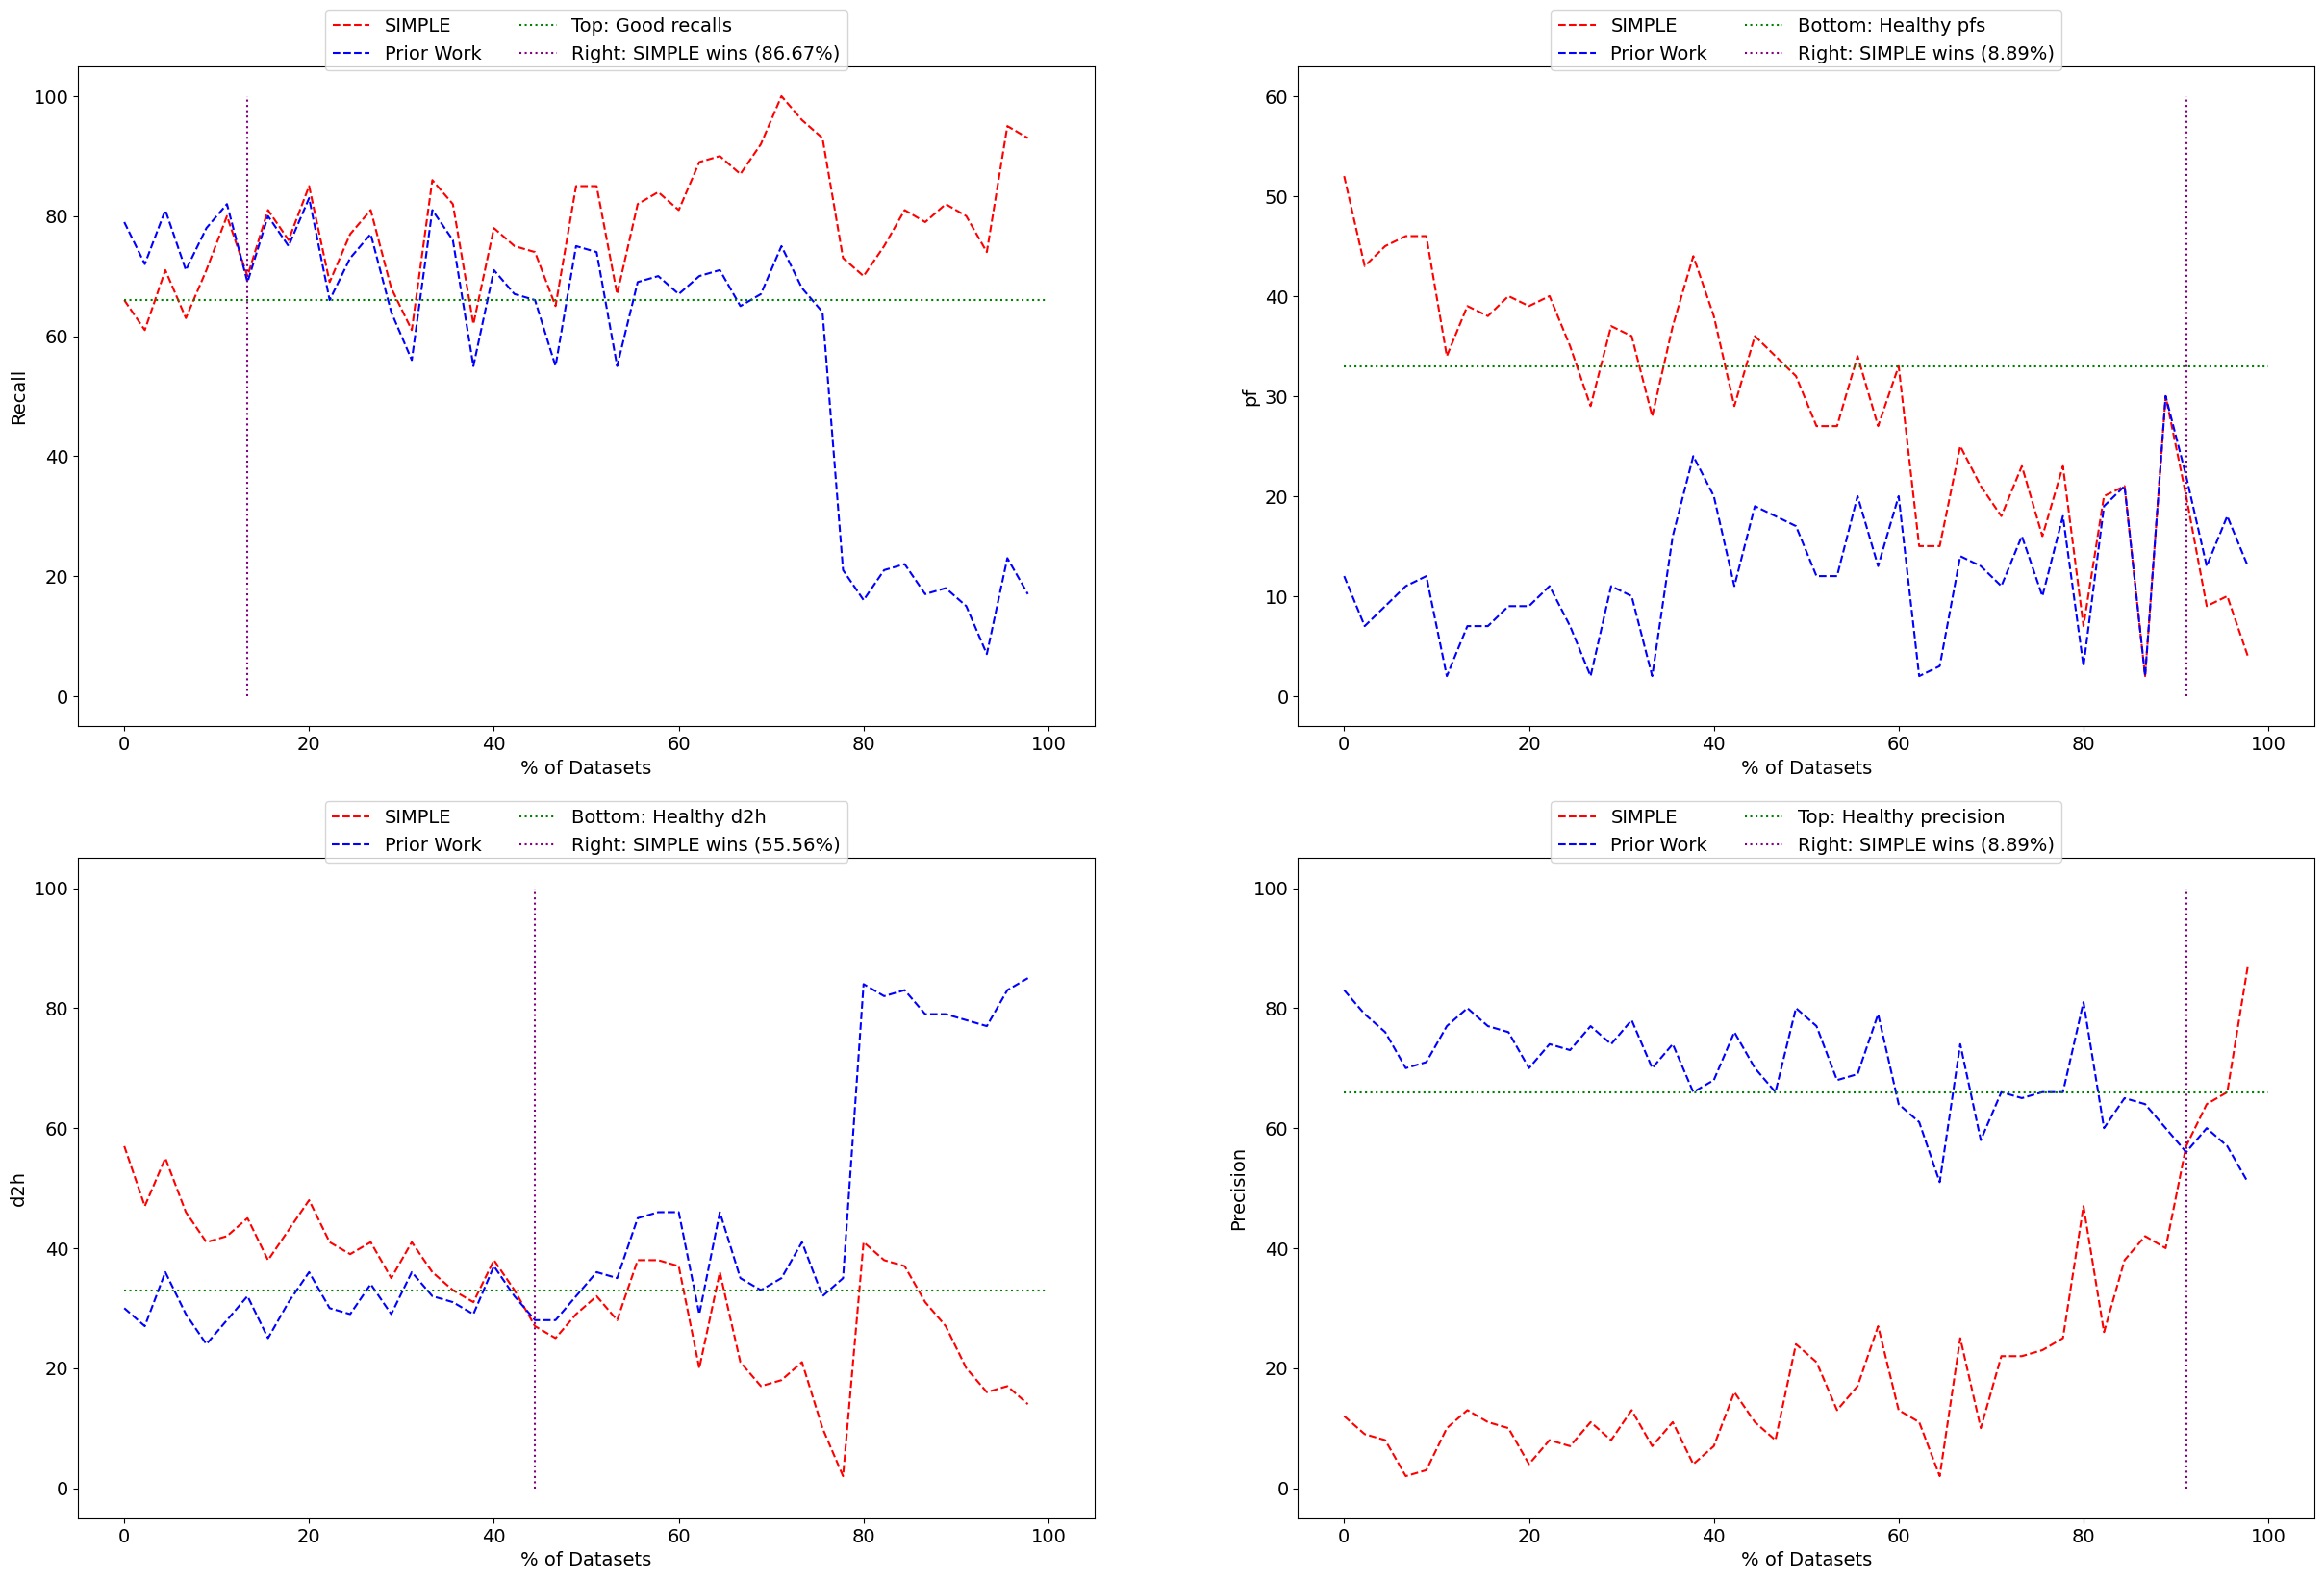

In [24]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, dpi=100, figsize=(30, 20))
xrange = np.array(range(len(pd_df))) * (100 / len(pd_df))

# Recall
split = round(np.where(pd_df[5] > 0)[0][0] * (100 / len(pd_df)), 2)
ax0.plot(xrange, pd_df[1], 'r--', label='SIMPLE')
ax0.plot(xrange, pd_df[3], 'b--', label='Prior Work')
ax0.plot([0, 100], [66, 66], 'g:', label='Top: Good recalls')
ax0.plot([split, split], [0, 100], color='purple', linestyle=':', label=f'Right: SIMPLE wins ({100-split}%)')
ax0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True)
ax0.set_xlabel('% of Datasets')
ax0.set_ylabel('Recall');

# pf
split = round(np.where(pf_df[5] > 0)[0][0] * (100 / len(pd_df)), 2)
ax1.plot(xrange, pf_df[1], 'r--', label='SIMPLE')
ax1.plot(xrange, pf_df[3], 'b--', label='Prior Work')
ax1.plot([0, 100], [33, 33], 'g:', label='Bottom: Healthy pfs')
ax1.plot([split, split], [0, 60], color='purple', linestyle=':', label=f'Right: SIMPLE wins ({100-split}%)')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True)
ax1.set_xlabel('% of Datasets')
ax1.set_ylabel('pf');

# d2h
split = round(np.where(d2h_df[5] > 0)[0][0] * (100 / len(pd_df)), 2)
ax2.plot(xrange, d2h_df[1], 'r--', label='SIMPLE')
ax2.plot(xrange, d2h_df[3], 'b--', label='Prior Work')
ax2.plot([0, 100], [33, 33], 'g:', label='Bottom: Healthy d2h')
ax2.plot([split, split], [0, 100], color='purple', linestyle=':', label=f'Right: SIMPLE wins ({100-split}%)')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True)
ax2.set_xlabel('% of Datasets')
ax2.set_ylabel('d2h');

# prec
split = round(np.where(prec_df[5] > 0)[0][0] * (100 / len(pd_df)), 2)
ax3.plot(xrange, prec_df[1], 'r--', label='SIMPLE')
ax3.plot(xrange, prec_df[3], 'b--', label='Prior Work')
ax3.plot([0, 100], [66, 66], 'g:', label='Top: Healthy precision')
ax3.plot([split, split], [0, 100], color='purple', linestyle=':', label=f'Right: SIMPLE wins ({100-split}%)')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True)
ax3.set_xlabel('% of Datasets')
ax3.set_ylabel('Precision');

In [25]:
fig.savefig('results.png', pad_inches=0, quality=95)

<ipython-input-25-27065c7fd4bb>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('results.png', pad_inches=0, quality=95)


In [206]:
len(df)

90

In [211]:
sum(pd_df[5] == 0)

0